# Introduction to Bayesian Data Analysis 


<img src="results\figures\presentation\1.png" width="500" height="500" align="center"/>


### Valerio Bonometti                                                                                    
**PhD Candidate University of York**

## Agenda

* Introduction
 
* Bayesian Gears

    * From counts to probability
    * Bayesian updating
    * Likelihood, Parameters, Prior and Posterior 

* Bayesian Machinery

    * Parameters Estimation
    * Grid Search, Quadratic Approximation, MCMC

* Bayesian Models
    
    * PyMC3 Model Building
    * Linear Regression
    * Logistic Regression
    * Graphical Models
    
* Q&A Session (if time)
    
    * Question and Answers
    * Live Coding

So let's get started that we have loads to cover in 60 minutes

I will do a br

## Introduction

### Introduction - Books

* [Statistical Rethinking 1st Edition (Chapters: 2, 3 and 4)](https://xcelab.net/rm/statistical-rethinking/)
* [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/)
* Edwin Thompson Jayne

### Introduction -  Online Material

* [Statistical Rethinking using PyMC3](https://github.com/pymc-devs/resources/tree/master/Rethinking_2)
* PyMC3 [tutorials](https://docs.pymc.io/nb_tutorials/index.html) and [learning materials](https://docs.pymc.io/learn.html)

### Introduction -  Libraries

* Core (Sections 1, 2)
    * Numpy
    * Scipy
    * Pandas
    * Matplolib 

* Extended (Section 3)
     * PyMC3
     * Theano (can be painful on Windows)
     * Seaborn

### Introduction - Rules


<img src="results\figures\presentation\2.png" width="400" height="400" align="center"/>


* No workshop on theoretical or applied statistics
* Very high level kickststarter to new framework
* Strong focus on visualization
* Play around! (we know it won't happen)
* Won't go into code (I am happy to answer any question)
* Little or no point estimates (no p-values or effect sizes)
* No explicit comparison with frequentist approach 
* [No Baye's rule neon sign](https://en.wikipedia.org/wiki/Bayes%27_theorem#/media/File:Bayes'_Theorem_MMB_01.jpg)

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.stats import binom, beta, norm

from sklearn.datasets import make_regression, make_classification

import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\valeriob\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Bayesian Gears
 
 
 <img src="results\figures\presentation\3.png" width="400" height="400" align="center"/>

#### *"It is the year 2040, a misterious and dangerous disease is spreading around the world. Border control is now the norm as people are not allowed to freely move around countries anymore "*

### Bayesian Gears - From Counts to Probability

<br/>
<br/>
<br/>

<img src="results\figures\presentation\4.jpg" width="500" height="500" align="center"/>

<br/>

| People Cueing | Number of Tests | Tests Outcomes |
| --- | --- | --- |
| 4 | 3 | Sick, Healthy, Sick |


<br/>
<br/>
<br/>

### Bayesian Gears - From Counts to Probability

<br/>

#### <center> How many sick people are cueing? <center>

<br/>

| HYPOTHESIS | WAYS TO S, H, S |
| --- | --- |
| H, H, H, H | 0 |
| S, H, H, H | 3 |
| S, S, H, H | 8 |
| **S, S, S, H** | **9**|
| S, S, S, S | 0 |

### Bayesian Gears - Bayesan Updating

<br/>

<img src="results\figures\presentation\5.png" width="300" height="300" align="center"/>

<br/>

#### <center> A person tries to pass border and results sick <center>

<br/>

| HYPOTHESIS | WAYS TO S| PREVIOUS |  WAYS TO S, H, S, S |
| --- | --- | --- | --- |
| H, H, H, H | 0 | 0 | 0 |
| S, H, H, H | 3 | 1 | 3 |
| S, S, H, H | 8 | 2 | 16 |
| **S, S, S, H** | **9**| **3** | **27** |
| S, S, S, S | 0 | 4 | 0 |

### Bayesian Gears - Likelihood and Parameters

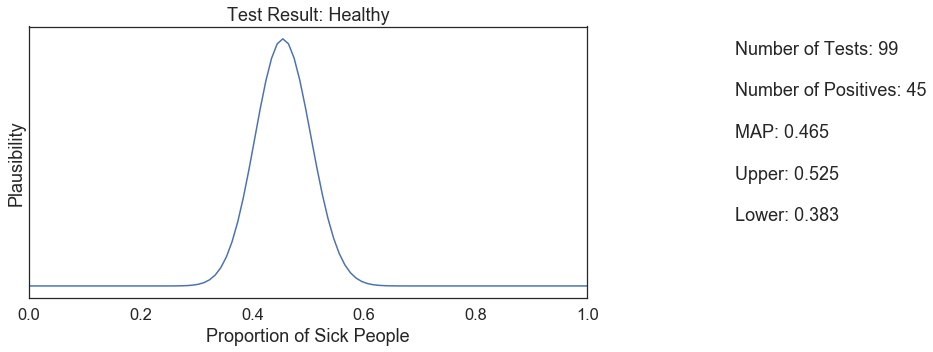

In [3]:
from modules.visuals import visualize_binomial_update

visualize_binomial_update(
    n_tests=100, 
    parameter_space=np.linspace(0, 1, 100),
    figsize=(10, 5),
    auto=True

)

### Bayesian Gears - Prior and Posterior

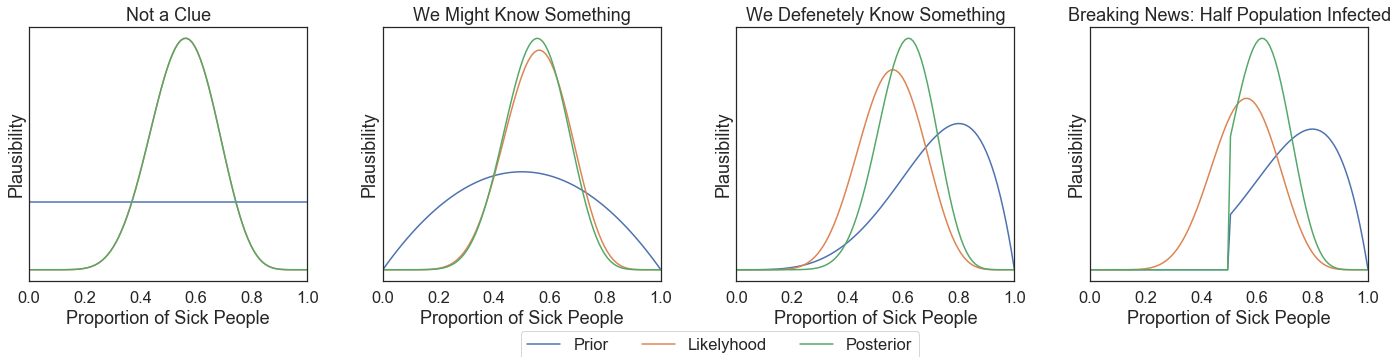

In [4]:
from modules.visuals import visualize_priors_effect

TESTED = 16
POSTIVES = 9

PARAMETER_SPACE = np.linspace(0, 1, 100)
PRIORS = {
    'Not a Clue': np.array([1] * len(PARAMETER_SPACE)),
    'We Might Know Something': beta(2, 2).pdf(PARAMETER_SPACE),
    'We Defenetely Know Something': beta(5, 2).pdf(PARAMETER_SPACE),
    'Breaking News: Half Population Infected': beta(5, 2).pdf(PARAMETER_SPACE),
}
PRIORS['Breaking News: Half Population Infected'][: 50] = 0

visualize_priors_effect(
    parameter_space=PARAMETER_SPACE,
    priors=PRIORS,
    likelyhood=binom.pmf(POSTIVES, TESTED, p=PARAMETER_SPACE),
    figsize=(20, 5)
)

## Bayesian Machinery

### Bayesian Machinery - Parameters Estimation

### Bayesian Machinery - Grid Search

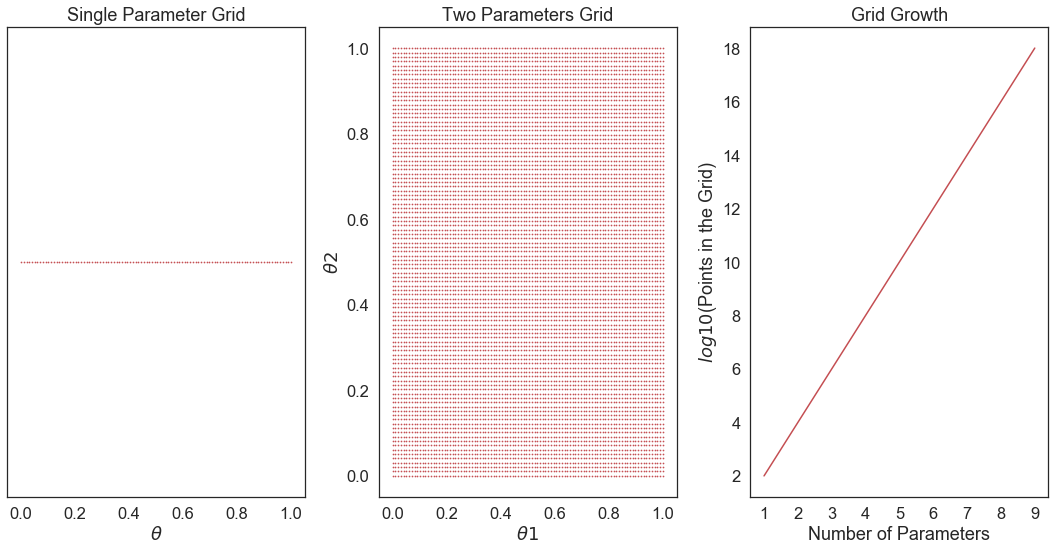

In [5]:
from modules.visuals import visualize_grid_search

visualize_grid_search(
    n_para=10, 
    n_approx_points=100,
)

### Bayesian Machinery - Quadratic Approximation

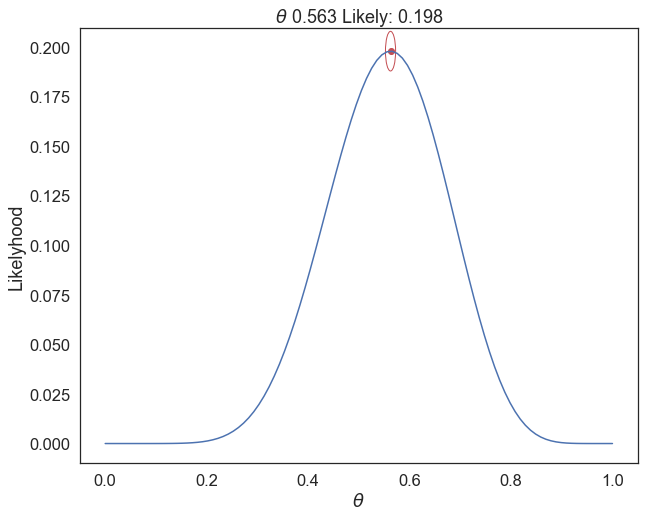

In [6]:
from modules.visuals import visulize_quadratic_approx

visulize_quadratic_approx(
    parameter_space=np.linspace(0, 1, 100), 
    n=16, 
    k=9, 
    figsize=(10, 8)
)

### Bayesian Machinery - Markov Chain Monte Carlo

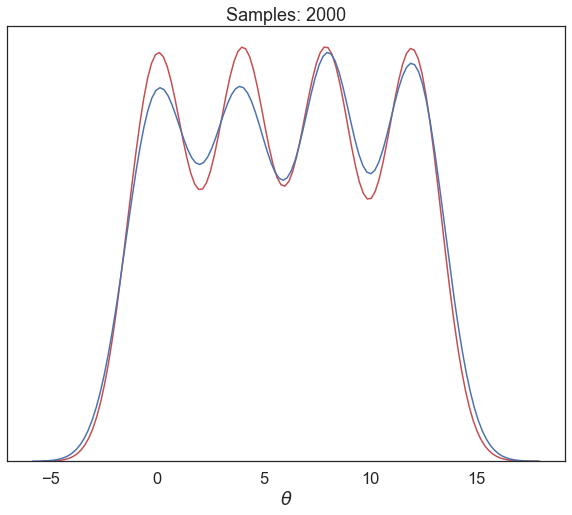

In [7]:
from modules.visuals import visualize_MC_sampling

frozen_distro=np.concatenate([norm.rvs(0, 1, 1000), norm.rvs(4, 1, 1000), norm.rvs(8, 1, 1000), norm.rvs(12, 1, 1000)])

visualize_MC_sampling(
    frozen_distro= frozen_distro, 
    max_sample=2000, 
    iterations=30,
    figsize=(10, 8)
)

## Bayesian Models

A Western traveler asks an Oriental philosopher to describe the nature of the world:  
  
“It is a great ball resting on the flat back of the world turtle.”  
“Ah yes, but what does the world turtle stand on?”  
“On the back of a still larger turtle.”  
“Yes, but what does he stand on?”  
“A very perceptive question. But it’s no use, mister; it’s turtles all the way down.”

<br/>

<img src="results\figures\presentation\6.jpg" width="300" height="300" align="center"/>

<br/>

### Bayesian Models - PyMC3 Model Building

![alt](results\figures\presentation\8.png)  
![alt](results\figures\presentation\9.png)
![alt](results\figures\presentation\10.png)


In [29]:
TESTED = 16
POSTIVES = 9

with pm.Model() as p_esitmation_model:
    
    # prior distribution of the paramter to estimate
    theta = pm.Beta(
        alpha=2,
        beta=2,
        name='parameter_p'
    )
    
    # the outocme distribution
    outcome = pm.Binomial(
        p=theta,
        observed=POSTIVES,
        n=TESTED,
        name='outcome'
    )

In [9]:
P_BEING_SICK = 0.56
POSTIVES = 9

with pm.Model() as p_esitmation_model:
    
    # prior distribution of the paramter to estimate
    theta = pm.HalfNormal(
        sigma=2.0,
        name='parameter_n'
    )
    
    # the outocme distribution
    outcome = pm.Binomial(
        p=P_BEING_SICK,
        observed=POSTIVES,
        n=theta,
        name='outcome'
    )

### Bayesian Models - Bivariate Normal Linear Regression

###  <center> $\mu_i \sim \beta_0 + \beta_1 X_i$ <center> 
###  <center> $y_i \sim N(\mu_i, \sigma)$ <center> 


<img src="results\figures\presentation\7.png" width="500" height="500" align="center"/>

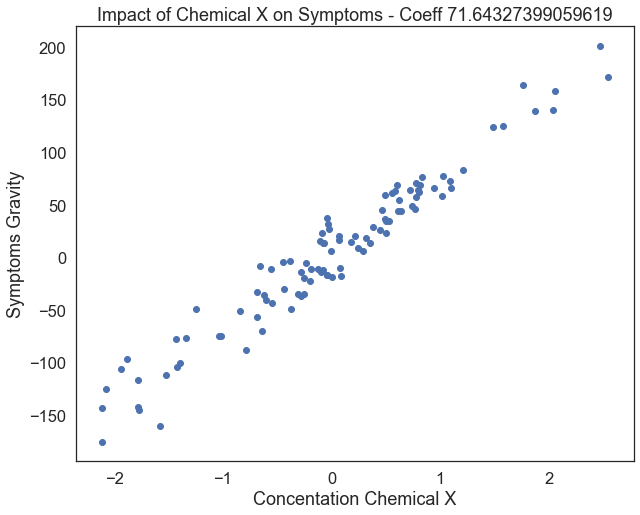

In [10]:
from modules.visuals import visualize_bivariate_regression

X, y, coef = make_regression(
    n_samples=100,
    n_features=1,
    noise=15,
    coef=True
)
X = X - X.mean()
X = X.flatten()

visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Concentation Chemical X',
    y_label='Symptoms Gravity',
    title=f'Impact of Chemical X on Symptoms - Coeff {coef}',
)

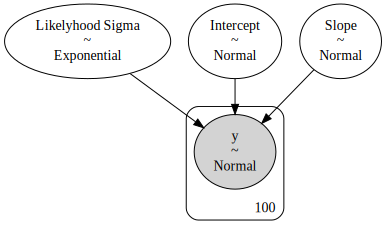

In [11]:
from modules.stats.models import BivariateNormalRegression

model = BivariateNormalRegression(
    intercept_prior=(0, 100),
    slope_prior=(0, 100),
    likelyhood_sigma_prior=100,
    X=X,
    y=y
)
model.show_plate()

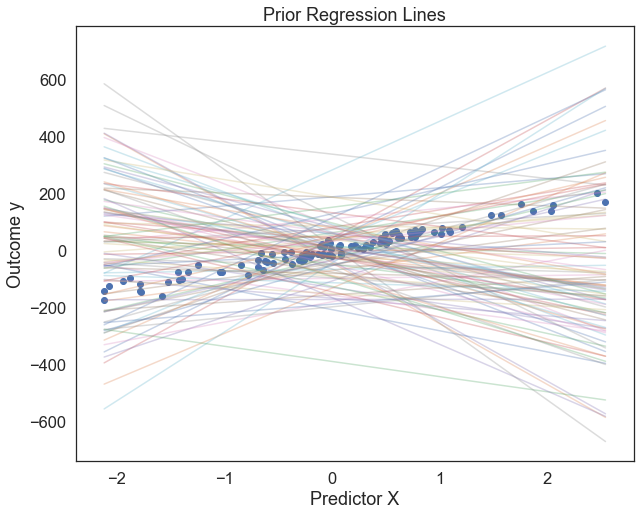

In [12]:
model.show_prior_summary()

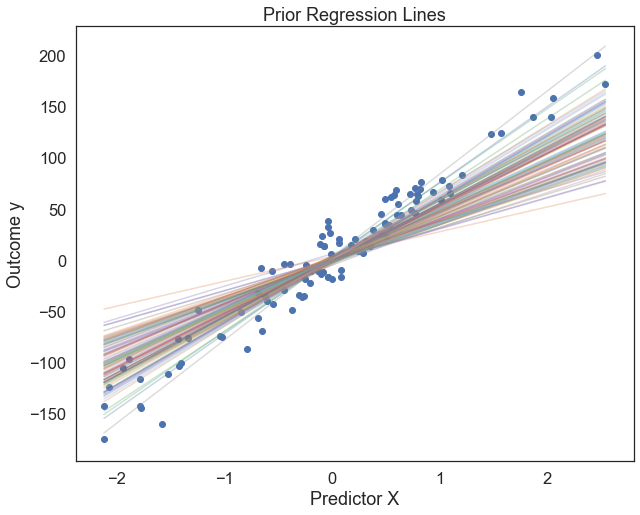

In [13]:
new_parameters = {
    'intercept_prior': (0, 2),
    'slope_prior': (50, 10),
    'likelyhood_sigma_prior': 1
    
}
model.riparametrize_priors(new_parameters=new_parameters)
model.show_prior_summary()

In [14]:
model.fit(
    X, 
    y, 
    MAP=True
)

Maximum A Posteriori

Intercept: 2.499665915494122
Slope: 71.67351708133313
Likelyhood Sigma_log__: 2.77921380438431
Likelyhood Sigma: 16.10635322473575


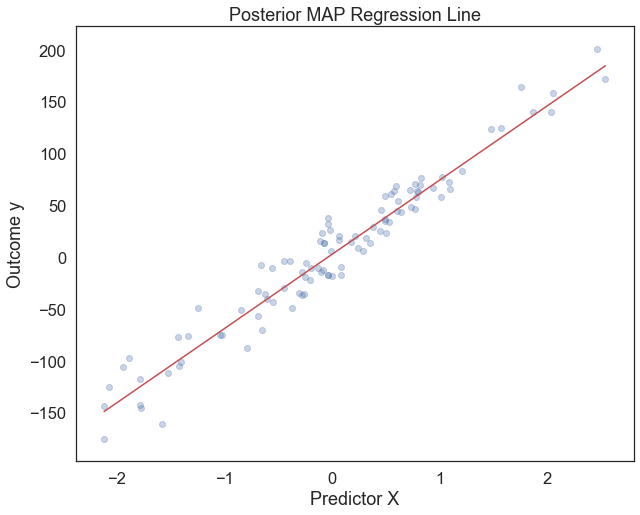

In [15]:
model.show_posterior_summary(c='r')

In [16]:
model.fit(
    X, 
    y, 
    MAP=False, 
    draws=1000, 
    tune=1000
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Likelyhood Sigma, Slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 40 seconds.


MCMC Estimates

                    mean     sd  hdi_3%  hdi_97%
Intercept          2.490  1.262   0.091    4.849
Slope             71.683  1.631  68.833   74.838
Likelyhood Sigma  16.387  1.058  14.475   18.296


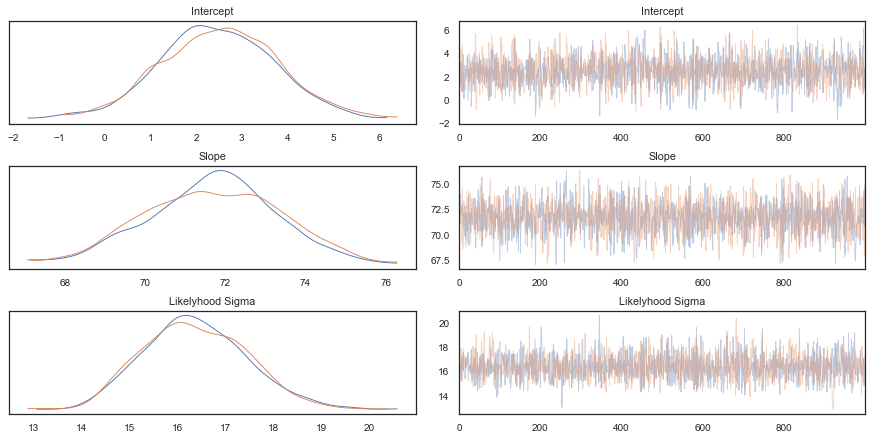

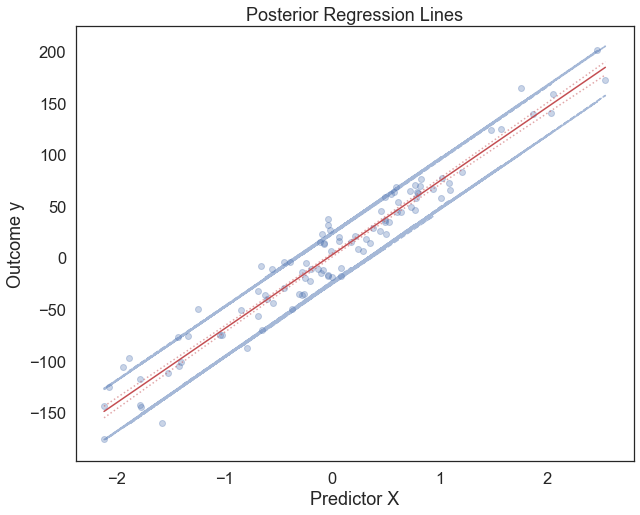

In [17]:
 model.show_posterior_summary() 

### Bayesian Models - Bivariate Logistic Regression



    
###  <center> $\beta_0 \sim N(\mu_0, \sigma_0)$ <center> 
###  <center> $\beta_1 \sim N(\mu_1, \sigma_1)$ <center> 
###  <center> $\theta_i \sim \beta_0 + \beta_1 X_i$ <center> 
###  <center> $p_i = S(\theta_i)$ <center> 
###  <center> $y_i \sim Bernoulli(p_i)$ <center> 

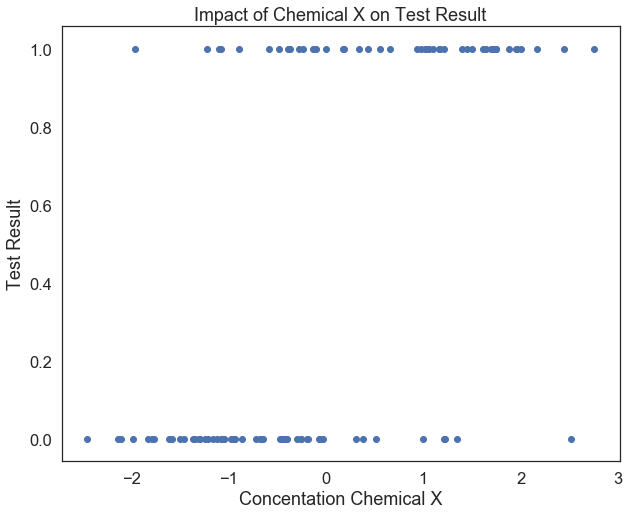

In [18]:
from modules.visuals import visualize_bivariate_regression

X, y = make_classification(
    n_samples=100,
    n_features=1,
    flip_y=0.25,
    n_informative=1,
    n_redundant=0,
    n_clusters_per_class=1 
)
X = X - X.mean()
X = X.flatten()

visualize_bivariate_regression(
    X=X,
    y=y,
    X_label='Concentation Chemical X',
    y_label='Test Result',
    title=f'Impact of Chemical X on Test Result',
)

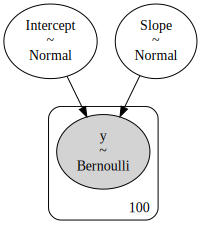

In [19]:
from modules.stats.models import BivariateLogisticRegression

model = BivariateLogisticRegression(
    intercept_prior=(0, 2),
    slope_prior=(0, 2),
    X=X,
    y=y
)
model.show_plate()

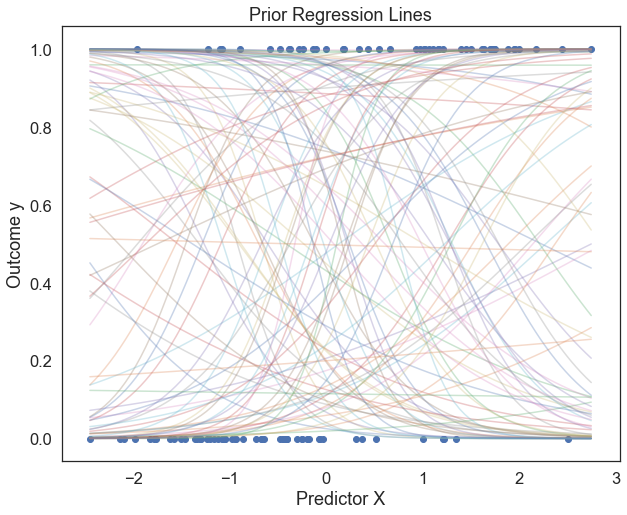

In [20]:
model.show_prior_summary()

In [21]:
model.fit(
    X, 
    y, 
    MAP=False, 
    draws=1000, 
    tune=1000
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 38 seconds.


MCMC Estimates

            mean     sd  hdi_3%  hdi_97%
Intercept -0.121  0.258  -0.622    0.329
Slope      1.251  0.253   0.778    1.717


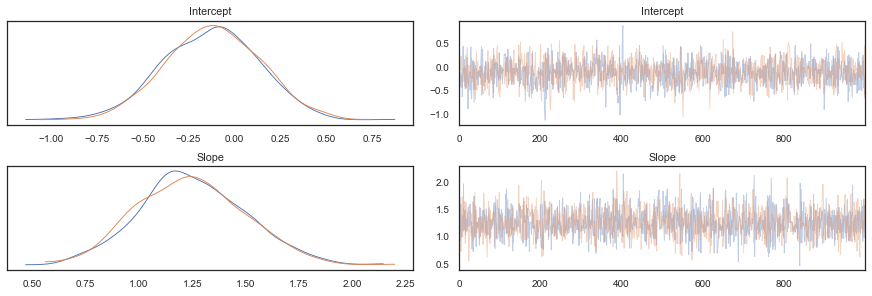

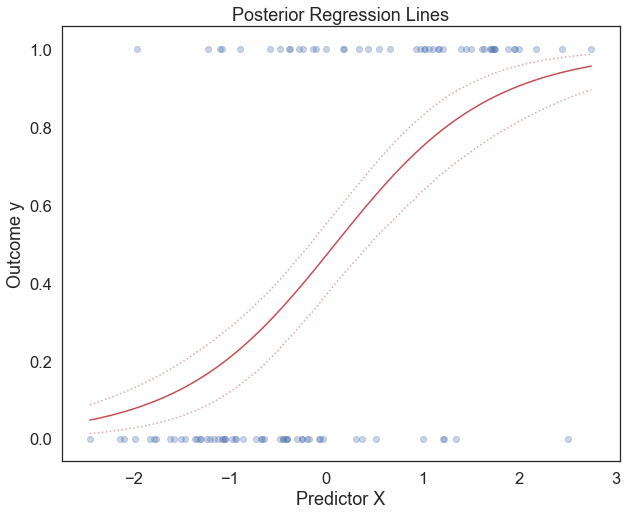

In [22]:
model.show_posterior_summary() 

### Bayesian Models - Graphical Models

Text(0, 0.5, 'Availability Compound saveourA900')

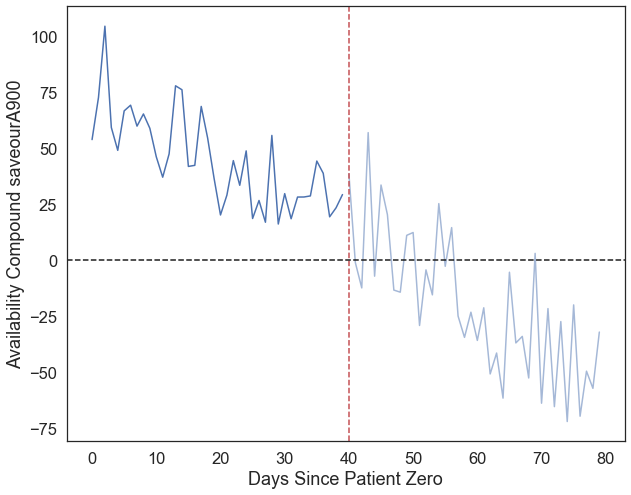

In [198]:
from scipy.stats import beta, norm

history_compound =[]
days = np.array([day for day in range(80)])
for day in days:
    
    precursor = norm.rvs(10, 2, 1) 
    
    multiplier_x = norm.rvs(5, 1, 1)
    multiplier_y = norm.rvs(2, 1, 1)
    
    chemical_x = norm.rvs(precursor * multiplier_x, 1, 1)
    chemical_y = norm.rvs(precursor * multiplier_y, 1, 1)
    
    beta_day = beta.rvs(2, 2, 1)
    
    chemical_z = (chemical_x + chemical_y) - (day * beta_day)
    
    saveoura900 = norm.rvs(chemical_z, np.random.exponential(scale=1))
    
    history_compound.append(saveoura900)
    
    
plt.figure(figsize=(10, 8))
plt.plot(
    days[:40],
    history_compound[:40]
)
plt.plot(
    days[40:],
    history_compound[40:],
    c='b',
    alpha=0.5
)
plt.axvline(40, c='r', linestyle='dashed')
plt.axhline(0, c='k', linestyle='dashed')
plt.xlabel('Days Since Patient Zero')
plt.ylabel('Availability Compound saveourA900')

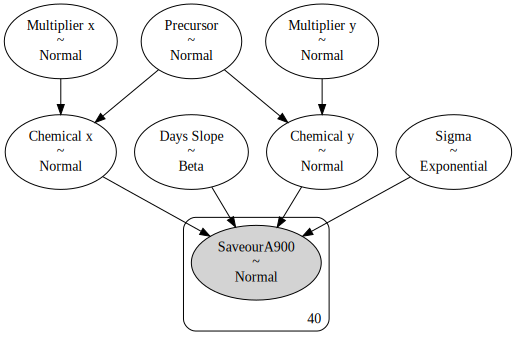

In [208]:
from modules.stats.models import CompoundModel

model = CompoundModel(
    X=days[:40],
    y=history_compound[:40]
)
model.show_plate()

In [209]:
model.fit(
    X, 
    y, 
    MAP=False, 
    draws=1000, 
    tune=1000
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Sigma, Days Slope, Chemical y, Chemical x, Multiplier y, Multiplier x, Precursor]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 58 seconds.
The number of effective samples is smaller than 25% for some parameters.


MCMC Estimates

                mean     sd  hdi_3%  hdi_97%
Precursor      9.494  1.487   6.789   12.326
Multiplier x   4.807  0.890   3.184    6.403
Multiplier y   1.835  0.938   0.147    3.742
Chemical x    44.969  7.680  30.392   59.033
Chemical y    16.572  7.648   2.605   31.837
Days Slope     0.867  0.080   0.725    0.990
Sigma         13.107  1.249  10.910   15.483


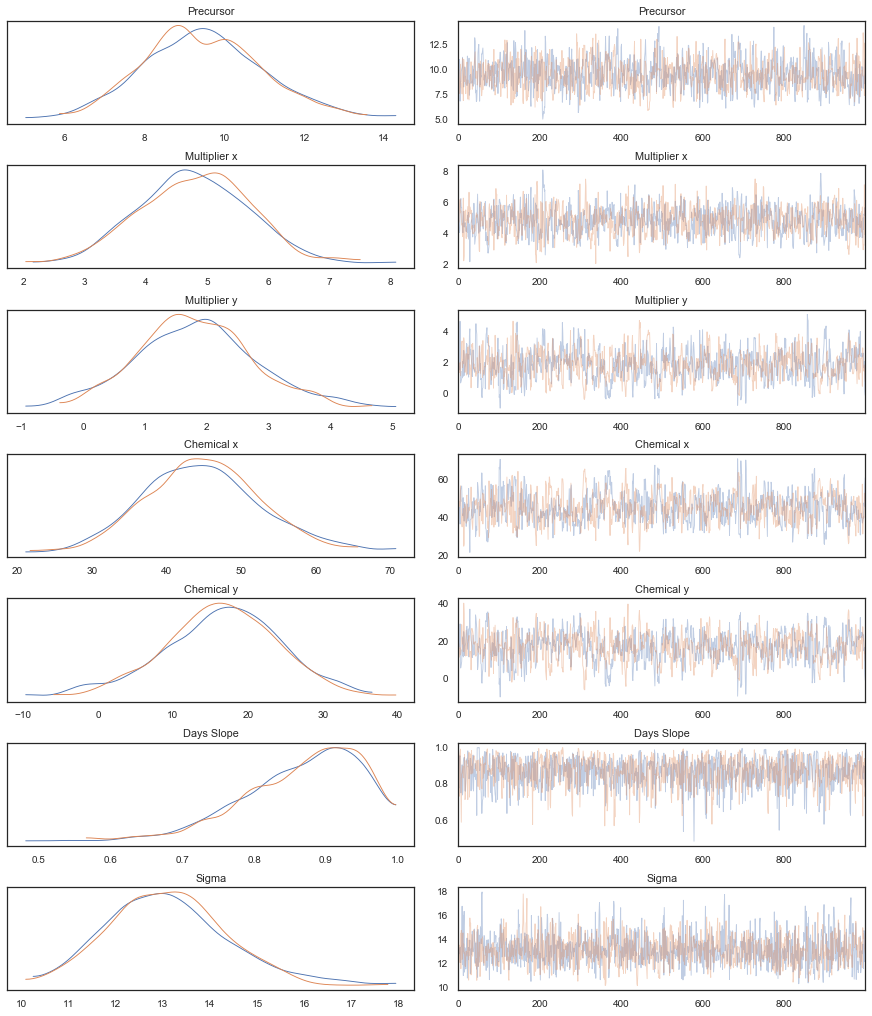

In [210]:
model.show_posterior_summary() 

Text(0, 0.5, 'Availability Compound saveourA900')

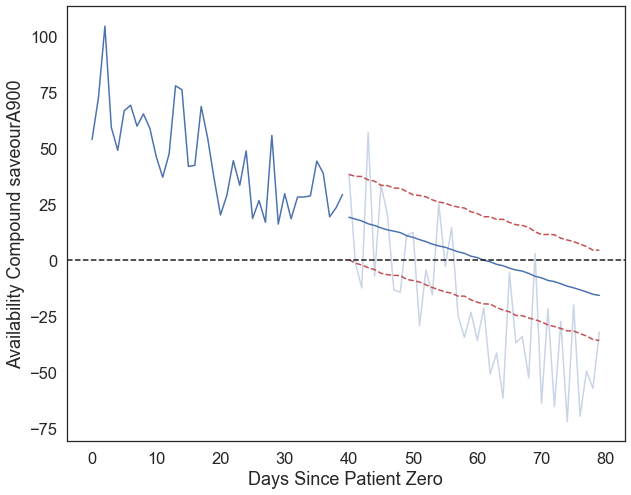

In [212]:
posterior_predictions = model.predict(
     X=days[40:],
     y=history_compound[40:]
 )

plt.figure(figsize=(10, 8))

plt.plot(
    days[:40],
    history_compound[:40]
)
plt.plot(
    days[40:],
    posterior['SaveourA900'].mean(axis=0),
    c='b'
)
plt.plot(
    days[40:],
    history_compound[40:],
    c='b',
    alpha=0.3
)

plt.plot(
    days[40:],
    np.percentile(posterior['SaveourA900'], 95, axis=0), 
    c='r', 
    linestyle='dashed'
)
plt.plot(
    days[40:],
    np.percentile(posterior['SaveourA900'], 5, axis=0), 
    c='r', 
    linestyle='dashed'
)


plt.axhline(0, c='k', linestyle='dashed')
plt.xlabel('Days Since Patient Zero')
plt.ylabel('Availability Compound saveourA900')